In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from IPython.display import Image

p = sns.color_palette(["mediumseagreen", "sandybrown", "royalblue", "orangered", "saddlebrown", "darkorchid"])


> # let's see our data

In [7]:
df = pd.read_csv("data.csv")
df.head(6)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0


# about features :

### Country (region) : Name of the country.
### Ladder : Cantril Ladder is a measure of life satisfaction.
### SD of Ladder : Standard deviation of the ladder.
### Positive affect : Measure of positive emotion.
### Negative affect : Measure of negative emotion.
### Social support : The extent to which Social support contributed to the calculation of the Happiness Score.
### Freedom : The extent to which Freedom contributed to the calculation of the Happiness Score.
### Corruption : The extent to which Perception of Corruption contributes to Happiness Score.
### Generosity : The extent to which Generosity contributed to the calculation of the Happiness Score.
### Log of GDP per capita : The extent to which GDP contributes to the calculation of the Happiness Score.
### Healthy life expectancy : The extent to which Life expectancy contributed to the calculation of the Happiness Score.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


> ## so, how many nan values in our features 

In [9]:
df.isna().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [10]:
# see the columns name to be easy to deal with 
col_named =  df.columns.values
col_named

array(['Country (region)', 'Ladder', 'SD of Ladder', 'Positive affect',
       'Negative affect', 'Social support', 'Freedom', 'Corruption',
       'Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy'],
      dtype=object)

#### bacause of small number of nan values , i replace them with mean of their columns

In [11]:
df['Corruption'].fillna(df['Corruption'].mean(),inplace=True)
df['Log of GDP\nper capita'].fillna(df['Log of GDP\nper capita'].mean(),inplace=True)
df['Healthy life\nexpectancy'].fillna(df['Healthy life\nexpectancy'].mean(),inplace=True)
df['Positive affect'].fillna(df['Positive affect'].mean(),inplace=True)
df['Negative affect'].fillna(df['Negative affect'].mean(),inplace=True)
df['Social support'].fillna(df['Social support'].mean(),inplace=True)
df['Freedom'].fillna(df['Freedom'].mean(),inplace=True)
df['Generosity'].fillna(df['Generosity'].mean(),inplace=True)

In [12]:
df.isna().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             0
Negative affect             0
Social support              0
Freedom                     0
Corruption                  0
Generosity                  0
Log of GDP\nper capita      0
Healthy life\nexpectancy    0
dtype: int64

## let's see the correlation between the features

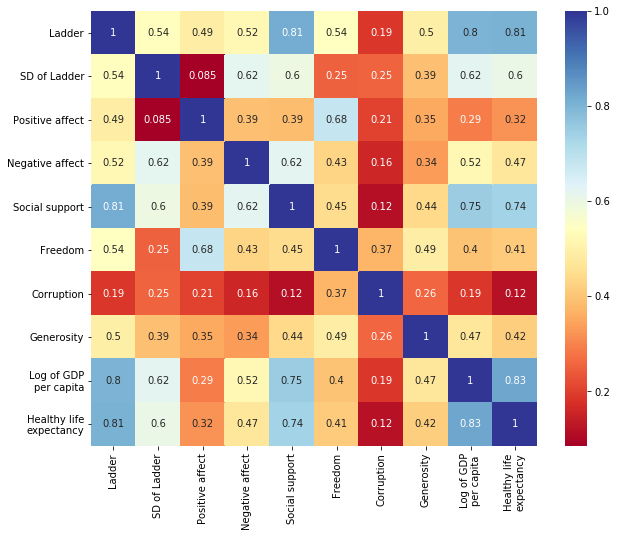

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdYlBu",annot = True)
plt.show()

## now show relation between the most correlated features 
### it shows with scatter plot not clear with histogram

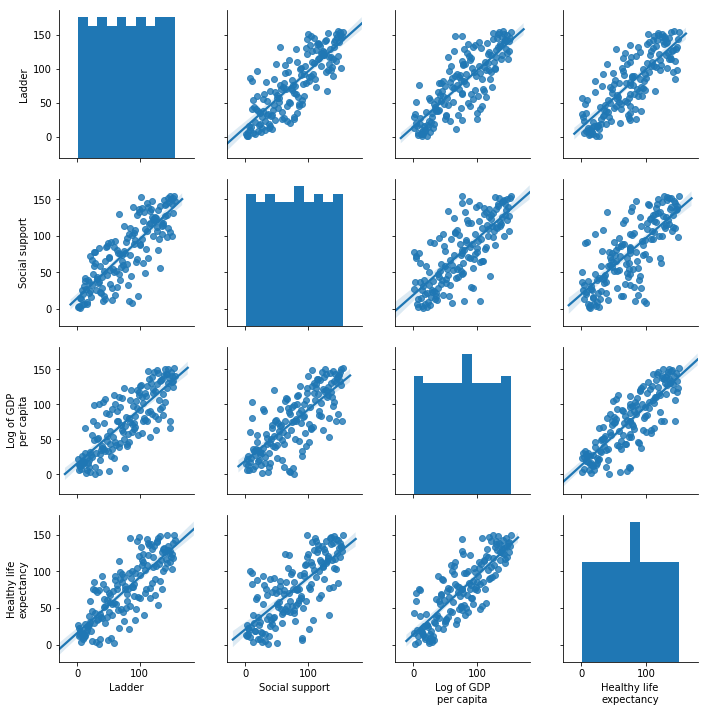

In [14]:
corr_features=['Ladder','Social support','Log of GDP\nper capita', 'Healthy life\nexpectancy']
sns.pairplot(df[corr_features], height =2.5, palette="husl",kind="reg")
plt.show()

## now we see that the satisfaction ladder increase with (social support , GDP , healthy life )
#### that make happiness affected with these feature in our life

## now we take less correlated features togethers 

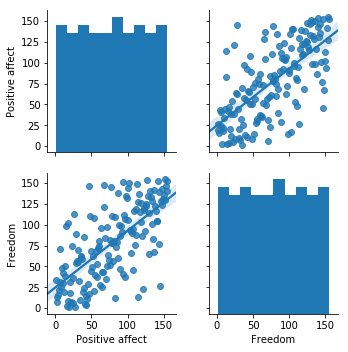

In [15]:
columns = ['Positive affect','Freedom']
sns.pairplot(df[columns], height =2.5,kind="reg")
plt.show()

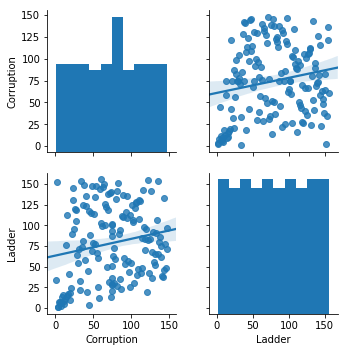

In [16]:
columns = ['Corruption','Ladder']
sns.pairplot(df[columns], height =2.5,kind="reg")
plt.show()

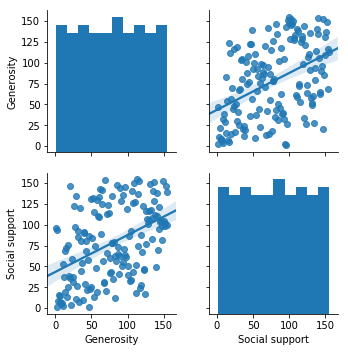

In [17]:
columns = ['Generosity','Social support']
sns.pairplot(df[columns], height =2.5,kind="reg")
plt.show()

#### after we see relation between features now i want to see every hot feature affect on each country in the world 
##### start with knowing the countries i have in this data .

In [18]:
countries = df['Country (region)'].unique().tolist()
countries

['Finland',
 'Denmark',
 'Norway',
 'Iceland',
 'Netherlands',
 'Switzerland',
 'Sweden',
 'New Zealand',
 'Canada',
 'Austria',
 'Australia',
 'Costa Rica',
 'Israel',
 'Luxembourg',
 'United Kingdom',
 'Ireland',
 'Germany',
 'Belgium',
 'United States',
 'Czech Republic',
 'United Arab Emirates',
 'Malta',
 'Mexico',
 'France',
 'Taiwan',
 'Chile',
 'Guatemala',
 'Saudi Arabia',
 'Qatar',
 'Spain',
 'Panama',
 'Brazil',
 'Uruguay',
 'Singapore',
 'El Salvador',
 'Italy',
 'Bahrain',
 'Slovakia',
 'Trinidad and Tobago',
 'Poland',
 'Uzbekistan',
 'Lithuania',
 'Colombia',
 'Slovenia',
 'Nicaragua',
 'Kosovo',
 'Argentina',
 'Romania',
 'Cyprus',
 'Ecuador',
 'Kuwait',
 'Thailand',
 'Latvia',
 'South Korea',
 'Estonia',
 'Jamaica',
 'Mauritius',
 'Japan',
 'Honduras',
 'Kazakhstan',
 'Bolivia',
 'Hungary',
 'Paraguay',
 'Northern Cyprus',
 'Peru',
 'Portugal',
 'Pakistan',
 'Russia',
 'Philippines',
 'Serbia',
 'Moldova',
 'Libya',
 'Montenegro',
 'Tajikistan',
 'Croatia',
 'Hong Kong

## let's see the affect of the corruption in the world after we saw it's relation with the ladder

In [19]:
data = dict(type = 'choropleth', 
           locations = df['Country (region)'],
           locationmode = 'country names',
           z = df['Corruption'], 
           text = df['Country (region)'],
           colorbar = {'title':'Corruption'},
           colorscale = "blues")
layout = dict(title = 'Corruption incountries 2019', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap = go.Figure(data = [data], layout=layout)
choromap.show()
# iplot(choromap,filename='d3-world-map2')

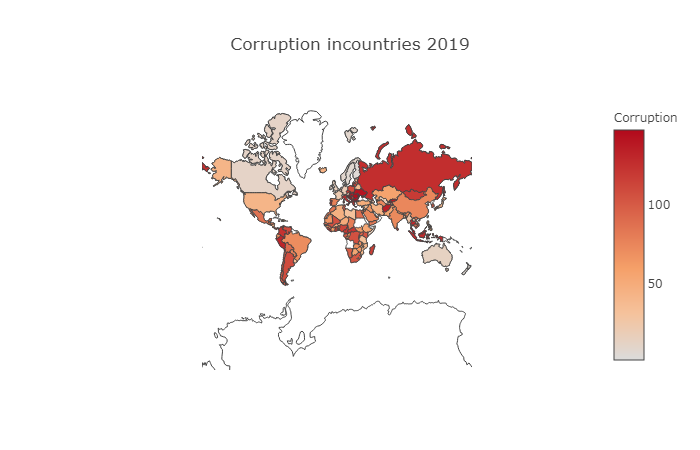

In [20]:
# if you are have plotly it it won't be shown so i save it as png
Image(filename="newplot.png")

## after that we'll see the ladder on these countries to compare with previous map
### that make me see that the countries with high corruption have less measure of life satisfaction

In [21]:
data = dict(type = 'choropleth', 
           locations = df['Country (region)'],
           locationmode = 'country names',
           z = df['Ladder'], 
           text = df['Country (region)'],
           colorbar = {'title':'Ladder'},
           colorscale = "Blues")
layout = dict(title = 'Life satisfaction ladder 2019', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap = go.Figure(data = [data], layout=layout)
choromap.show()
# iplot(choromap,filename='d3-world-map1')


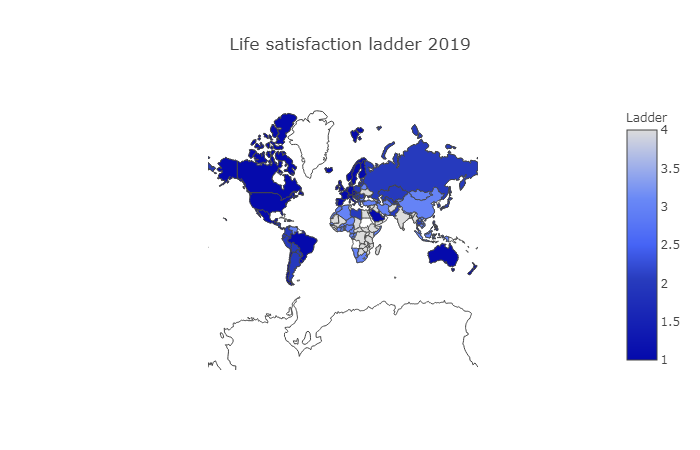

In [22]:
# if you are have plotly it it won't be shown so i save it as png
Image(filename="newplot (1).png")

### after that we'll see the range of GDP in different countries around world to see if same with high ladder or not 
### to see if life happiness depends on the amount of GDP

In [23]:
data = dict(type = 'choropleth', 
           locations = df['Country (region)'],
           locationmode = 'country names',
           z = df['Log of GDP\nper capita'], 
           text = df['Country (region)'],
           colorbar = {'title':'GDP'},
           colorscale = "Greens")
layout = dict(title = 'GDP per captia 2019', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap = go.Figure(data = [data], layout=layout)
choromap.show()
# iplot(choromap,filename='d3-world-map')

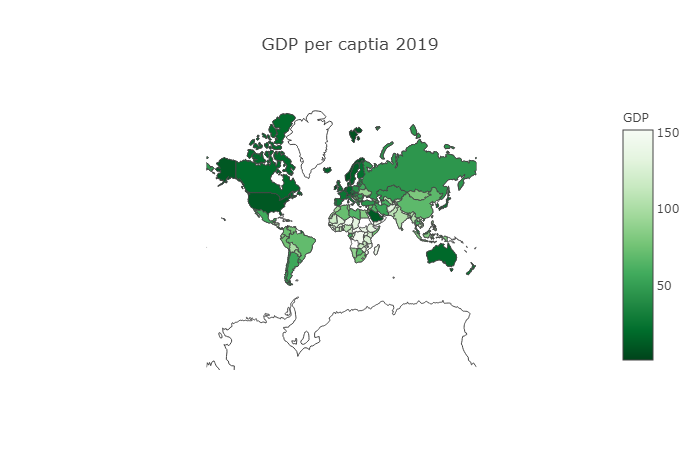

In [24]:
# if you are have plotly it it won't be shown so i save it as png
Image(filename="newplot (2).png")

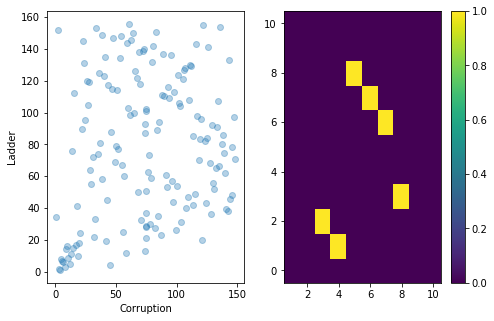

In [25]:
# try to see the relation beteen corruption and ladder in heatmap but not clearly showing 
plt.figure(figsize = [12, 5])

# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1, 3, 1)
sns.regplot(data = df, x = 'Corruption', y = 'Ladder', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

# right plot: heat map with bin edges between values
plt.subplot(1, 3, 2)
bins_x = np.arange(0.5, 10.5+1, 1)
bins_y = np.arange(-0.5, 10.5+1, 1)
plt.hist2d(data = df, x = 'Corruption', y = 'Ladder',
           bins = [bins_x, bins_y])
plt.colorbar();


## now we make another way to understand some facts from our data 
### we devide our counrties into groups to classify more details.
#### so we make some categories like (arab , europe , north and south america )

In [26]:
arab = ['Saudi Arabia','Qatar','Bahrain','Kuwait','Libya', 'Palestinian Territories','Algeria','Morocco','Jordan','Lebanon','Somalia','Tunisia',
       'Iraq','Egypt','Syria','Yemen','South Sudan']
north_america = ["Canada", "Costa Rica", "United States", "Mexico",  
                 "Panama","Trinidad and Tobago", "El Salvador", "Belize", "Guatemala",
                 "Jamaica", "Nicaragua", "Dominican Republic", "Honduras",
                 "Haiti"]
south_america = ["Chile", "Brazil", "Argentina", "Uruguay",
                 "Colombia", "Ecuador", "Bolivia", "Peru",
                 "Paraguay", "Venezuela"]
europe = ["Norway", "Denmark", "Iceland", "Switzerland", "Finland",
                 "Netherlands", "Sweden", "Austria", "Ireland", "Germany",
                 "Belgium", "Luxembourg", "United Kingdom", "Czech Republic",
                 "Malta", "France", "Spain", "Slovakia", "Poland", "Italy",
                 "Russia", "Lithuania", "Latvia", "Moldova", "Romania",
                 "Slovenia", "North Cyprus", "Cyprus", "Estonia", "Belarus",
                 "Serbia", "Hungary", "Croatia", "Kosovo", "Montenegro",
                 "Greece", "Portugal", "Bosnia and Herzegovina", "Macedonia",
                 "Bulgaria", "Albania", "Ukraine"]

asia = ["Israel", "United Arab Emirates", "Singapore", "Thailand", "Taiwan Province of China",
                 "Qatar", "Saudi Arabia", "Kuwait", "Bahrain", "Malaysia", "Uzbekistan", "Japan",
                 "South Korea", "Turkmenistan", "Kazakhstan", "Turkey", "Hong Kong S.A.R., China", "Philippines",
                 "Jordan", "China", "Pakistan", "Indonesia", "Azerbaijan", "Lebanon", "Vietnam",
                 "Tajikistan", "Bhutan", "Kyrgyzstan", "Nepal", "Mongolia", "Palestinian Territories",
                 "Iran", "Bangladesh", "Myanmar", "Iraq", "Sri Lanka", "Armenia", "India", "Georgia",
                 "Cambodia", "Afghanistan", "Yemen", "Syria"]
d_europe = dict.fromkeys(europe, 'Europe')
d_arab = dict.fromkeys(arab, 'Arab')
d_north_america = dict.fromkeys(north_america, 'North America')
d_south_america = dict.fromkeys(south_america, 'South America')
d_asia = dict.fromkeys(asia, 'asia')
group_dict = {**d_europe, **d_north_america, **d_south_america, **d_arab,**d_asia}
df["group"] = df["Country (region)"].map(group_dict)
#df.group.fillna("Africa", inplace=True)

### first impression we see the ladder with our data 

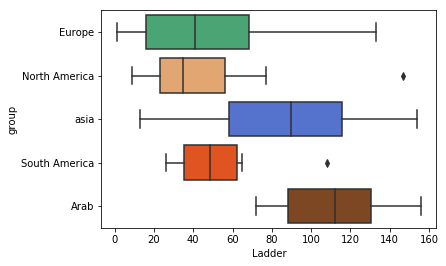

In [27]:
sns.boxplot(x="Ladder", y="group", data=df, palette=p)

#### and after that we see some other sides of our life affetion on our groups of countries but with the violin plot to see more clear the data range of spreading.

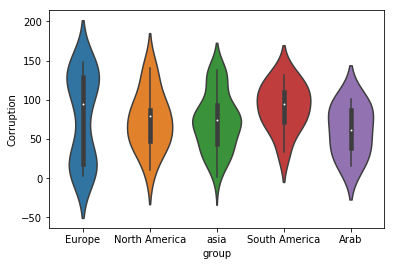

In [28]:
sns.violinplot(data = df, x = 'group',y= 'Corruption')
plt.show()

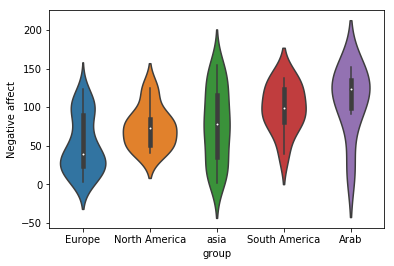

In [29]:
sns.violinplot(data = df, x = 'group',y= 'Negative affect')
plt.show()

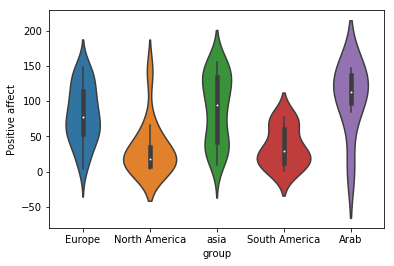

In [30]:
sns.violinplot(data = df, x = 'group',y= 'Positive affect')
plt.show()

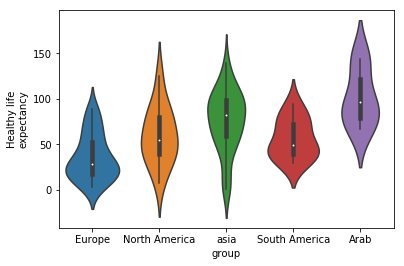

In [31]:
sns.violinplot(data = df, x = 'group',y= 'Healthy life\nexpectancy')
plt.show()

In [32]:
# # 'very happy' = 1,'happy'= 2,'sad'= 3,'very sad'=4
df['Ladder'] =  pd.cut(df['Ladder'],4,labels=['1','2','3','4'])
# encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Ladder'] = le.fit_transform(df['Ladder'])
# # df['Ladder']

In [33]:
X = df.iloc[:, 2:10].values
y = df.iloc[:, 1].values
# # Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-2.15012115e-01,  1.08877142e+00, -9.36163274e-01,
        -5.35717679e-01,  1.30638235e+00,  1.65749476e+00,
        -3.34813239e-01,  4.06077287e-01],
       [ 1.13493737e+00,  2.08139443e-01, -2.75118147e-01,
         1.16758981e+00,  1.91660279e-01,  1.01660209e+00,
        -6.47810429e-01,  8.53267194e-01],
       [-5.75180088e-02, -1.73376696e+00, -1.03059829e+00,
        -2.89186332e-01, -2.54228550e-01,  2.77110542e-01,
         8.72461639e-01, -4.21224042e-01],
       [-1.27247254e+00,  1.49521694e+00, -1.12503331e+00,
        -1.05119232e+00,  1.08343794e+00, -9.55375368e-01,
         4.92393622e-01, -3.98864547e-01],
       [ 1.58492053e+00,  7.95227425e-01,  1.51914720e+00,
         1.63824057e+00,  4.59193577e-01, -1.86860767e-02,
         7.83033870e-01,  1.16630013e+00],
       [ 1.65241800e+00,  9.30709267e-01,  1.23584214e+00,
         1.30206146e+00,  2.13954721e-01, -3.88431849e-01,
         1.31960048e+00,  7.86188708e-01],
       [-1.47514641e-01, -1.395062

In [34]:
df['Ladder'] =  pd.cut(df['Ladder'],4,labels=['1','2','3','4'])


In [35]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA(n_components =3)
# X_train = lda.fit_transform(X, df['y_clf'])
# X_test = lda.transform(X_test)


In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
X_train

array([[-4.87004967e-01,  2.07280614e+00],
       [-1.25594990e+00, -4.34797161e-01],
       [ 9.63396873e-01, -4.42699439e-01],
       [ 6.97999177e-01,  2.24236370e+00],
       [-3.00200579e+00, -9.37253272e-01],
       [-2.67934975e+00, -8.46505805e-01],
       [ 9.51545633e-01, -8.23447011e-01],
       [ 1.00536057e+00, -3.18583695e-01],
       [-2.40721809e+00,  6.03740532e-01],
       [-2.97981174e+00, -2.48637842e-01],
       [ 6.22576244e-01,  2.54047446e+00],
       [ 2.54489652e+00, -3.63390533e-01],
       [ 5.05442806e-01,  2.23376611e+00],
       [ 1.29802320e+00, -1.14496338e+00],
       [-4.24101891e-01, -9.14994115e-01],
       [-5.76062442e-01, -8.93570726e-01],
       [ 4.37040224e+00, -6.85804511e-01],
       [-2.06799335e+00,  1.03373025e-01],
       [ 1.79107160e+00,  5.67094466e-01],
       [-1.12798141e+00,  3.82447864e-01],
       [ 3.70953457e+00, -4.26893141e-01],
       [-2.97701207e+00,  1.90318194e+00],
       [ 6.30790981e-01, -8.88260400e-01],
       [-2.

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


C:\Users\cisco126\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\cisco126\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 1 2 0 0 0 3 3 0 1 0 3 3 0 3 0 2 3 3 3 0 2 0 0 3 0 0 1 0 0 0]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

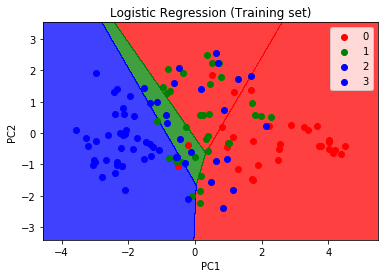

In [39]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [40]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7 1 0 0]
 [7 0 0 1]
 [3 2 1 2]
 [0 0 2 6]]
